# Применение регрессионного анализа и интерпретация результатов

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress, t

In [100]:
url = r'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
data = pd.read_csv(url)

In [101]:
data

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


In [102]:
Y = np.array(data['female_house'])
X = np.array(data['white'])

In [103]:
N = len(Y)

In [104]:
sd_y = np.std(Y, ddof=1)
sd_x = np.std(X, ddof=1)

In [105]:
r = pearsonr(X, Y)
r

PearsonRResult(statistic=-0.7513943740717667, pvalue=2.11513759586498e-10)

In [106]:
reg = linregress(X, Y)
reg

### Строим график

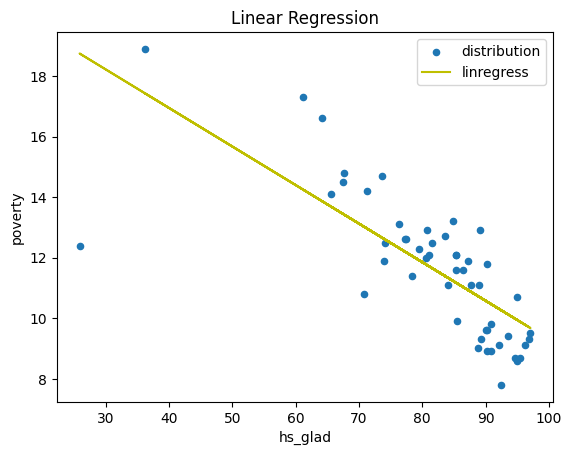

In [107]:
plt.title('Linear Regression')
plt.xlabel('hs_glad')
plt.ylabel('poverty')
plt.scatter(X, Y, s=20, label='distribution')
#plt.plot(X, Y, 'og')
plt.plot(X, reg.intercept + reg.slope*X, 'y', label='linregress')
plt.legend()
plt.show()

### Находим коэффициент детерминации R2

In [111]:
SSres = sum(map(lambda y, x: (y - (reg.intercept + reg.slope*x)) ** 2, Y, X))
SStotal = sum(map(lambda i: (i - Y.mean()) ** 2, Y))

In [112]:
R2 = 1 - SSres / SStotal
R2

0.5645935053867022

### Находим 95% доверительный интервал

In [108]:
tinv = lambda p, df: abs(t.ppf(p/2, df))

In [109]:
ts = tinv(0.05, N-2)
print(f'slope (95%): {reg.slope:.6f} +/- {ts*reg.stderr:.6f}')

slope (95%): -0.127392 +/- 0.032117


In [110]:
print(f'intercept (95%): {reg.intercept:.6f} +/- {ts*reg.intercept_stderr:.6f}')

intercept (95%): 22.043797 +/- 2.661503


### Гистограмма значиний по выбранному столбцу

<Axes: >

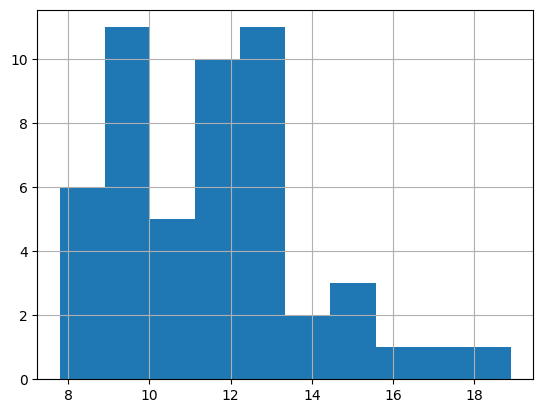

In [115]:
pd.Series(data['female_house']).hist()